$$ E[f(x)] = \int_x f(x) p(x) dx \approx \sum_x f(x) p(x)$$

$$ f(x) = c + \sum_n^\infty a_n cos(n\omega x) + \sum_n^\infty b_n sin(n\omega x)$$


$$ E[f(x)] \approx c + \sum_n^\infty a_n \left( \sum_x p(x) cos(n \omega x) \right) + \sum_n^\infty b_n \left( \sum_x p(x) sin(n \omega x) \right)$$

Notice: p(x) is the *discretized, normalized* distribution encoded in register's amplitudes, *not* the theoretical distribution.

In [1]:
# Useful additional packages 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


In [11]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.circuit import AncillaRegister, Parameter
from qiskit.algorithms import IterativeAmplitudeEstimation, EstimationProblem
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import Aer, execute
backend = Aer.get_backend('aer_simulator')



# Initialize distribution

<StemContainer object of 3 artists>

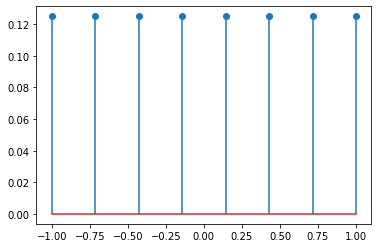

In [3]:
nqubits = 3
npoints = 2**nqubits
xlower = -1
xupper = 1
xuu = 2
xpoints = np.linspace(xlower, xupper, npoints) 
distribution = stats.uniform(xlower, xupper-xlower).pdf(xpoints)
# distribution = stats.norm().pdf(xpoints)
distribution_normalized = distribution/distribution.sum()
distribution_amplitudes = np.sqrt(distribution_normalized)
plt.stem(xpoints, distribution_normalized)

# Fourier parameters

In [17]:
from fourier import *
qc = create_cirquit(distribution_amplitudes)

# def amplitude_estimation(qc, alpha, theta, epsilon=.01, conf_lvl=.05, backend=backend):
#     # # Quantum Amplitude Estimation using IAE
#     par_alpha = qc.parameters[0]
#     par_theta = qc.parameters[1]
#     qcn = qc.assign_parameters({par_alpha: alpha, 
#                           par_theta: theta})


#     # construct amplitude estimation
#     ancilla_qubit = qcn.num_qubits-1
#     problem = EstimationProblem(state_preparation=qcn,
#                                            objective_qubits=[ancilla_qubit])

#     IAE = IterativeAmplitudeEstimation(epsilon_target=epsilon,  alpha=conf_lvl, quantum_instance=backend)

#     # result_cvar = IAE.estimate(problem)
#     qcn = IAE.construct_circuit(problem, k=3, measurement=True)
#     # counts = backend.run(qcn, shots=1).result().get_counts()

#     return qcn


# qc = amplitude_estimation(qc, 0.1, 0.5, backend=backend)
# qc.draw('mpl')

# # Execute the circuit on the qasm
# # simulator
# job = execute(qc, backend, shots=10000000)
   
# # Grab results from the job
# result = job.result()
   
# # Return counts
# counts = result.get_counts(qc)
# print("\nTotal count for 00 and 11 are:",counts)
  
# backend.run(qc, shots=1)

In [5]:
def integral(qc, n, beta, omega, delta, xlower, epsilon=0.01):
    alpha = n*omega*xlower - beta
    theta = n*omega * delta
    backend = Aer.get_backend('aer_simulator')
    phase_good = amplitude_estimation(qc, alpha, theta, epsilon=epsilon, conf_lvl=0.05, backend=backend) 
    return 1 - 2* phase_good

def sum_estimation(y, distribution, nfourier, xpoints):
    distribution = distribution(xpoints)
    distribution_normalized = distribution/distribution.sum()
    distribution_amplitudes = np.sqrt(distribution_normalized)
    qc = create_cirquit(distribution_amplitudes)
    period = xpoints[-1] - xpoints[0]
    omega = 2*np.pi /period
    delta = period/(npoints-1)
    a0, a, b = real_coeffs(y, nfourier)
    s = a0/2
    for n in range(nfourier-1):
        cos_sum = integral(qc, n, 0, omega, delta, x[0])
        sin_sum = integral(qc, n, np.pi/2, omega, delta, x[0])
        s += a[n]*cos_sum + b[n]*sin_sum
    return s

def classical_estimation(y, distribution, nfourier, xpoints):
    period = xpoints[-1] - xpoints[0]
    omega = 2*np.pi /period
    delta = period/(npoints-1)
    distribution = distribution(xpoints)
    distribution_normalized = distribution/distribution.sum()
    cos_sum = lambda n: np.sum( np.cos(n*omega*xpoints) * distribution_normalized)
    sin_sum = lambda n: np.sum( np.sin(n*omega*xpoints) * distribution_normalized)
    a0, a, b = real_coeffs(y, nfourier)
    s = a0/2
    func = np.zeros_like(y) + a0/2
    for n in range(nfourier-1):
        s += a[n]*cos_sum(n) + b[n]*sin_sum(n)
        phase = n*omega*x
        func += a[n] * np.cos(phase) + b[n]*np.sin(phase)
    return s
    
    



In [6]:


nfourier=10
nqubits = 3
npoints = 2**nqubits
xlower = -1
xupper = 1
xuu = 2
xpoints = np.linspace(xlower, xupper, npoints) 
distribution = stats.uniform(xlower, xupper-xlower).pdf
x = np.linspace(xlower, xupper, 400, endpoint=True) 
# func = lambda x: x
# func_derivative = lambda x: 1
# Func = periodic_extension(func, func_derivative, xlower, xupper, xuu)
y = x

s1 = classical_estimation(y, distribution, nfourier, xpoints)
print('-----')
s2 = sum_estimation(y, distribution, nfourier, xpoints)

NameError: name 'real_coeffs' is not defined

In [ ]:
s2

In [ ]:
s1